In [10]:
from lib.utils import aggregate_pred_dataframe, generate_mean_ensemble_metrics_auto
import pandas as pd
import os

def read_models(key):
    valids_by_folds = [[] for _ in range(5)]
    tests_by_folds = [[] for _ in range(5)]
    for fold in range(5):
        directory = f'result_cv/{key}/fold_{fold}/intermediate'
        files = [f for f in os.listdir(directory) if f.startswith('iter_')]
        files.sort(key=lambda x: int(x.split('_')[1]))
        test_files = [f for f in files if f.endswith('test.csv')]
        valid_files = [f for f in files if f.endswith('valid.csv')]
        print(test_files)
        for file in test_files:
            fold_pred = pd.read_csv(f'{directory}/{file}')
            tests_by_folds[fold].append(fold_pred)
            
        for file in valid_files:
            fold_pred = pd.read_csv(f'{directory}/{file}')
            valids_by_folds[fold].append(fold_pred)
    return tests_by_folds, valids_by_folds

In [11]:
tf, vf = read_models('esm-33-gearnet-ensemble')

['iter_0_test.csv', 'iter_1_test.csv', 'iter_2_test.csv', 'iter_3_test.csv', 'iter_4_test.csv', 'iter_5_test.csv', 'iter_6_test.csv', 'iter_7_test.csv', 'iter_8_test.csv', 'iter_9_test.csv', 'iter_10_test.csv', 'iter_11_test.csv', 'iter_12_test.csv', 'iter_13_test.csv', 'iter_14_test.csv', 'iter_15_test.csv', 'iter_16_test.csv', 'iter_17_test.csv', 'iter_18_test.csv', 'iter_19_test.csv', 'iter_20_test.csv', 'iter_21_test.csv', 'iter_22_test.csv', 'iter_23_test.csv', 'iter_24_test.csv', 'iter_25_test.csv', 'iter_26_test.csv', 'iter_27_test.csv', 'iter_28_test.csv', 'iter_29_test.csv', 'iter_30_test.csv', 'iter_31_test.csv', 'iter_32_test.csv', 'iter_33_test.csv', 'iter_34_test.csv', 'iter_35_test.csv', 'iter_36_test.csv', 'iter_37_test.csv', 'iter_38_test.csv', 'iter_39_test.csv', 'iter_40_test.csv', 'iter_41_test.csv', 'iter_42_test.csv', 'iter_43_test.csv', 'iter_44_test.csv', 'iter_45_test.csv', 'iter_46_test.csv', 'iter_47_test.csv', 'iter_48_test.csv', 'iter_49_test.csv']
['iter_0_

In [7]:
def aggregate_pred_prefixes(valids_by_folds, tests_by_folds):
    mx = len(valids_by_folds[0])
    for i in range(1, len(valids_by_folds)):
        assert len(valids_by_folds[i]) == mx
        assert len(tests_by_folds[i]) == mx
        
    df = pd.DataFrame()
    for i in range(0, mx):
        print(f'iter {i}')
        for fold in range(5):
            df_valid = aggregate_pred_dataframe(dfs=valids_by_folds[fold][:i], apply_sig=True)
            df_test = aggregate_pred_dataframe(dfs=tests_by_folds[fold][:i], apply_sig=True)
            
            me_metric = generate_mean_ensemble_metrics_auto(df_valid=df_valid, df_test=df_test, start=0.1, end=0.6, step=0.01)
            df = pd.concat([df, pd.DataFrame([{**me_metric, 'fold': fold, 'n_models': i}])])
    return df

In [25]:
def read_and_aggregate(key):
    tf, vf = read_models(key)
    return aggregate_pred_prefixes(valids_by_folds=vf, tests_by_folds=tf)

df_esm_33_gearnet_ensemble = read_and_aggregate('esm-33-gearnet-ensemble')

['iter_0_test.csv', 'iter_1_test.csv', 'iter_2_test.csv', 'iter_3_test.csv', 'iter_4_test.csv', 'iter_5_test.csv', 'iter_6_test.csv', 'iter_7_test.csv', 'iter_8_test.csv', 'iter_9_test.csv', 'iter_10_test.csv', 'iter_11_test.csv', 'iter_12_test.csv', 'iter_13_test.csv', 'iter_14_test.csv', 'iter_15_test.csv', 'iter_16_test.csv', 'iter_17_test.csv', 'iter_18_test.csv', 'iter_19_test.csv', 'iter_20_test.csv', 'iter_21_test.csv', 'iter_22_test.csv', 'iter_23_test.csv', 'iter_24_test.csv', 'iter_25_test.csv', 'iter_26_test.csv', 'iter_27_test.csv', 'iter_28_test.csv', 'iter_29_test.csv', 'iter_30_test.csv', 'iter_31_test.csv', 'iter_32_test.csv', 'iter_33_test.csv', 'iter_34_test.csv', 'iter_35_test.csv', 'iter_36_test.csv', 'iter_37_test.csv', 'iter_38_test.csv', 'iter_39_test.csv', 'iter_40_test.csv', 'iter_41_test.csv', 'iter_42_test.csv', 'iter_43_test.csv', 'iter_44_test.csv', 'iter_45_test.csv', 'iter_46_test.csv', 'iter_47_test.csv', 'iter_48_test.csv', 'iter_49_test.csv']
['iter_0_

In [16]:
df_esm_33_gearnet_ensemble

,sensitivity,specificity,accuracy,precision,mcc,micro_auroc,fold,n_models
0,0.6300,0.9874,0.9689,0.7315,0.6627,0.9101,0,1
0,0.6475,0.9879,0.9703,0.7450,0.6791,0.9307,1,1
0,0.6108,0.9900,0.9703,0.7691,0.6704,0.8974,2,1
0,0.5710,0.9917,0.9699,0.7903,0.6570,0.9214,3,1
0,0.6316,0.9886,0.9701,0.7514,0.6735,0.9200,4,1
...,...,...,...,...,...,...,...,...
0,0.6651,0.9873,0.9706,0.7407,0.6865,0.9431,0,49
0,0.6459,0.9895,0.9717,0.7700,0.6907,0.9463,1,49
0,0.7033,0.9856,0.9710,0.7277,0.7002,0.9497,2,49
0,0.6954,0.9861,0.9710,0.7315,0.6980,0.9486,3,49


<Axes: xlabel='n_models'>

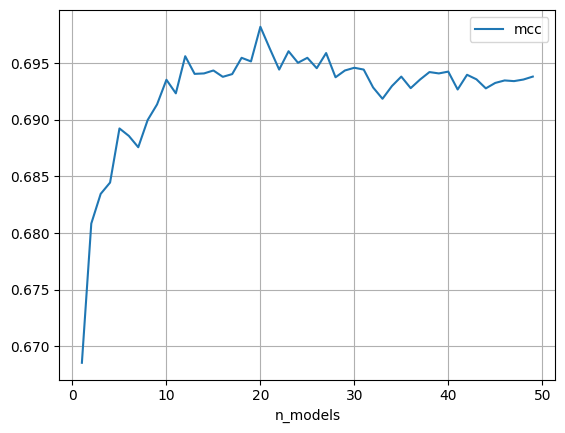

In [26]:
%matplotlib inline
df_esm_33_gearnet_ensemble.groupby('n_models').aggregate('mean').plot(y='mcc', grid=True)

In [21]:
df_esm_33_resiboost_v2 = read_and_aggregate('esm-33-gearnet-resiboost-v2')

['iter_0_test.csv', 'iter_1_test.csv', 'iter_2_test.csv', 'iter_3_test.csv', 'iter_4_test.csv', 'iter_5_test.csv', 'iter_6_test.csv', 'iter_7_test.csv', 'iter_8_test.csv', 'iter_9_test.csv', 'iter_10_test.csv', 'iter_11_test.csv', 'iter_12_test.csv', 'iter_13_test.csv', 'iter_14_test.csv', 'iter_15_test.csv', 'iter_16_test.csv', 'iter_17_test.csv', 'iter_18_test.csv', 'iter_19_test.csv', 'iter_20_test.csv', 'iter_21_test.csv', 'iter_22_test.csv', 'iter_23_test.csv', 'iter_24_test.csv', 'iter_25_test.csv', 'iter_26_test.csv', 'iter_27_test.csv', 'iter_28_test.csv', 'iter_29_test.csv']
['iter_0_test.csv', 'iter_1_test.csv', 'iter_2_test.csv', 'iter_3_test.csv', 'iter_4_test.csv', 'iter_5_test.csv', 'iter_6_test.csv', 'iter_7_test.csv', 'iter_8_test.csv', 'iter_9_test.csv', 'iter_10_test.csv', 'iter_11_test.csv', 'iter_12_test.csv', 'iter_13_test.csv', 'iter_14_test.csv', 'iter_15_test.csv', 'iter_16_test.csv', 'iter_17_test.csv', 'iter_18_test.csv', 'iter_19_test.csv', 'iter_20_test.csv'

<Axes: xlabel='n_models'>

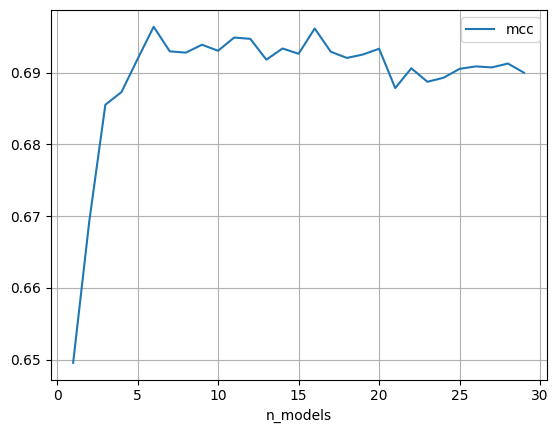

In [24]:
df_esm_33_gearnet_ensemble.groupby('n_models').aggregate('mean').plot(y='mcc', grid=True)